## 1. Import Required Libraries

In [1]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Reading and Understanding of data

In [3]:
bike_data=pd.read_csv('C:\\DATA\\day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking count of null values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Assigning string values to different season instead of numeric values

# 1.spring
bike_data.loc[(bike_data['season']==1),'season']='spring'

# 2.summer
bike_data.loc[(bike_data['season']==2),'season']='summer'

# 3.fall
bike_data.loc[(bike_data['season']==3),'season']='fall'

# 4.Winter
bike_data.loc[(bike_data['season']==4),'season']='winter'

In [10]:
# Checking whether a conversion has been done in a right manner or not
bike_data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# For year {0:2018,1:2019}
bike_data['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [12]:
# Assigning string values to different month instead of numeric values
def month_name(x):
    return x.map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike_data[['mnth']]=bike_data[['mnth']].apply(month_name)

In [13]:
# Checking whether a conversion has been done in a right manner or not
bike_data['mnth'].value_counts()

Dec      62
Jan      62
Aug      62
July     62
May      62
March    62
Oct      62
Nov      60
April    60
Sept     60
June     60
Feb      56
Name: mnth, dtype: int64

In [14]:
# Assigning string values to different weekdays instead of numeric values

def weekday_name(x):
    return x.map({0:'Sunday',1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Friday',6:'Sat'})
bike_data[['weekday']]=bike_data[['weekday']].apply(weekday_name)

In [15]:
# Checking whether a conversion has been done in a right manner or not
bike_data['weekday'].value_counts()

Mon       105
Tues      105
Thurs     104
Sunday    104
Sat       104
Friday    104
Wed       104
Name: weekday, dtype: int64

In [16]:
# If a day is neither weekend nor a holiday it takes value 1 ,otherwise 0
bike_data['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [17]:
#Assigning string values to different weathersit instead of numeric values.
bike_data.loc[(bike_data['weathersit']==1),'weathersit']='Clear'
bike_data.loc[(bike_data['weathersit']==2),'weathersit']='Mist'
bike_data.loc[(bike_data['weathersit']==3),'weathersit']='Light snow'
bike_data.loc[(bike_data['weathersit']==4),'weathersit']='Heavy rain'


In [18]:
#Checking whether a conversion has been done in a right manner or not
bike_data['weathersit'].value_counts()

Clear         463
Mist          246
Light snow     21
Name: weathersit, dtype: int64

In [19]:
bike_data.columns
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [21]:
# Converting date to datetime format

bike_data['dteday']=bike_data['dteday'].astype('datetime64')

In [22]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## 3.Data Visualization

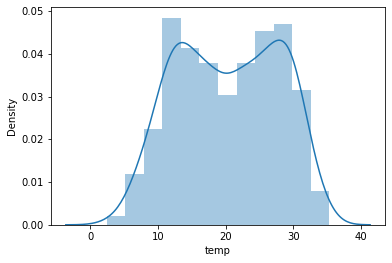

In [23]:
# Data Visualization
# Univariate analysis

sns.distplot(bike_data['temp'])
plt.show()

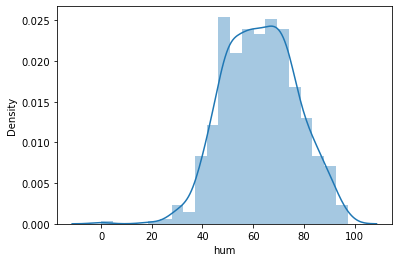

In [24]:
sns.distplot(bike_data['hum'])
plt.show()

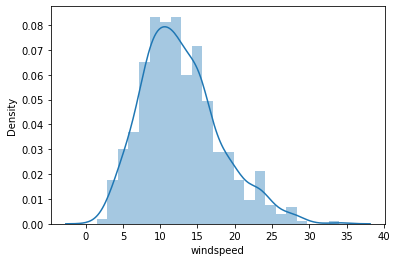

In [25]:
sns.distplot(bike_data['windspeed'])
plt.show()

##### Obervations- Wind speed mostly lies in around 10

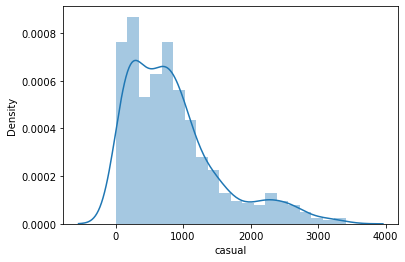

In [26]:
sns.distplot(bike_data['casual'])
plt.show()

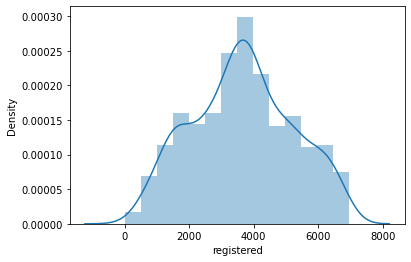

In [27]:
sns.distplot(bike_data['registered'])
plt.show()

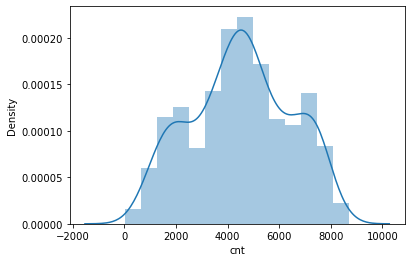

In [28]:
sns.distplot(bike_data['cnt'])
plt.show()

In [29]:
# Find all categorical columns

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [30]:
# Find all categorical variables in the dataset
bike_data_categorical=bike_data[['season','yr','mnth','holiday', 'weekday','workingday','weathersit']]
bike_data_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

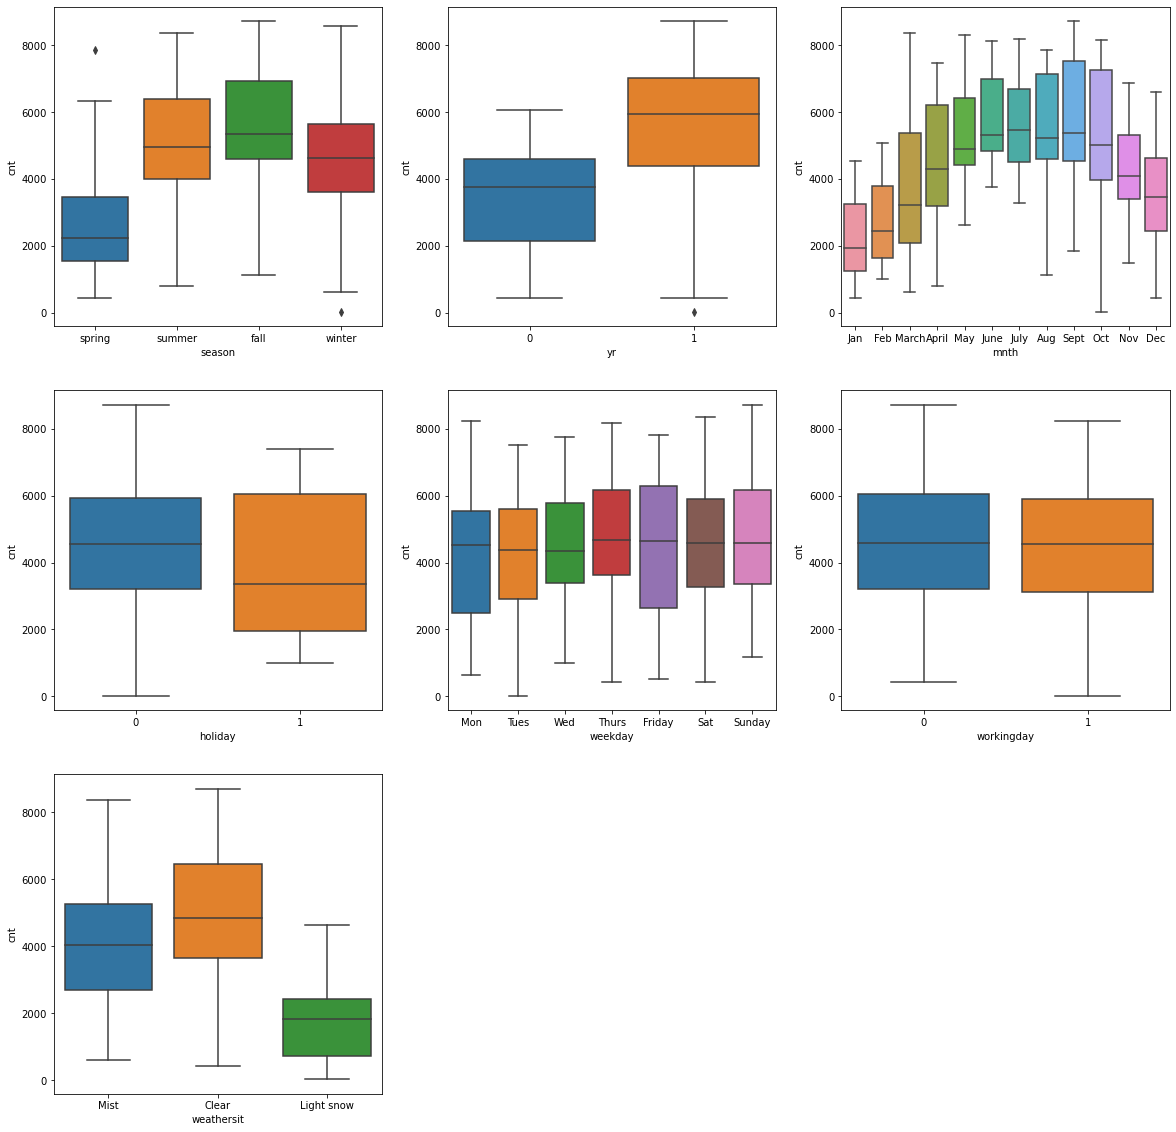

In [31]:
# Visualizing categorical variable using boxplot

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_data)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_data)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_data)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_data)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike_data)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)
plt.show()

##### observations-
#1) Fall has the highest median, which is expected as weather conditons are most beneficial to ride  bike 
#2) Median ,bike rents are increasing year on year 2019 has higher median as compared to 2018, It can be the company became popular and people are beoming more aware of that
#3) Among the months,June,july ,august which is fall season have shown higher median of bikes as compared to other months.
#4) People rent more on non-holidays compared to holiday so reason might be people use personal vehicle instead of bike rentals.
#5) Across all the days median of rentals is same.
#6) Working and non- working days almost same median although spread for non-working days is slightly higher as compared to working days as people have plans.
#7) Clear weather is most prefered for bike renting as temperature is not high humidity is less. 


### Visualizing numerical column

In [32]:
# Visualizing numerical column

intvariable_list=['temp','atemp','hum','windspeed','casual','registered','cnt']
intvariable_list

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

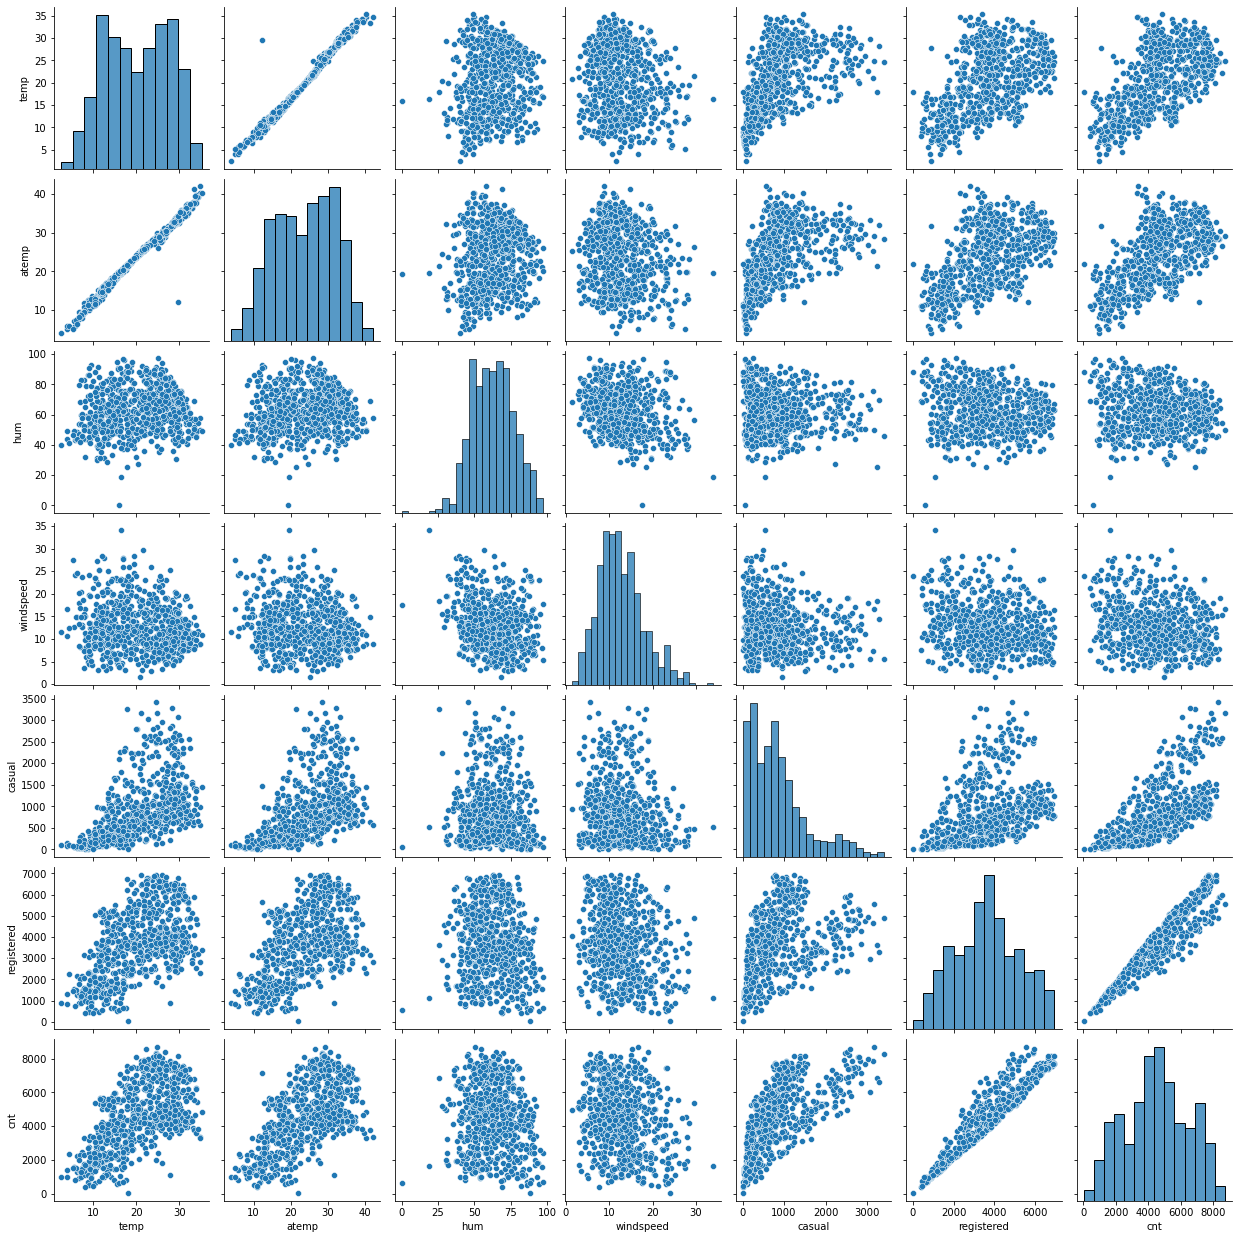

In [33]:
sns.pairplot(bike_data[intvariable_list])
plt.show()

In [34]:
# Find a correlation among numerical variables
corr=bike_data[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


##### Observation-'atemp' has highest correlation among predictors to target variable'cnt'( ignoring as (causal+registerd) is equal to 'Cnt)

<AxesSubplot:>

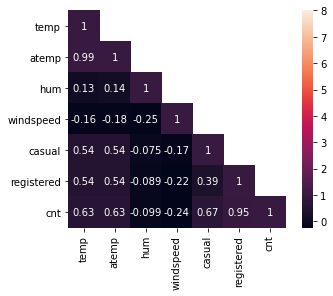

In [35]:
# Heatmap

mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corr,mask=mask,vmax=8,square=True,annot=True)

In [36]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## 4. Data Preparation

In [37]:
# Removing unwanted columns 'dteday' and 'instant'
bike_data_new=bike_data[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp','hum', 'windspeed','cnt']]


In [38]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [39]:
# Converting columnns into categroy
bike_data_new['season']=bike_data_new['season'].astype('category')
bike_data_new['mnth']=bike_data_new['mnth'].astype('category')
bike_data_new['weekday']=bike_data_new['weekday'].astype('category')
bike_data_new['weathersit']=bike_data_new['weathersit'].astype('category')

In [40]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [41]:
# Converting  data into dummy
bike_data_new=pd.get_dummies(bike_data_new,drop_first=True)

In [42]:
# Checking data converted to dummy or not
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_Aug               730 non-null    uint8  
 12  mnth_Dec               730 non-null    uint8  
 13  mnth_Feb               730 non-null    uint8  
 14  mnth_Jan               730 non-null    uint8  
 15  mnth_J

In [43]:
bike_data_new.shape

(730, 30)

In [44]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_Aug               730 non-null    uint8  
 12  mnth_Dec               730 non-null    uint8  
 13  mnth_Feb               730 non-null    uint8  
 14  mnth_Jan               730 non-null    uint8  
 15  mnth_J

## 5.Train and test split data

In [45]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test=train_test_split(bike_data_new,train_size= 0.70,test_size= 0.30,random_state=120)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 557 to 158
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    int64  
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   temp                   510 non-null    float64
 4   atemp                  510 non-null    float64
 5   hum                    510 non-null    float64
 6   windspeed              510 non-null    float64
 7   cnt                    510 non-null    int64  
 8   season_spring          510 non-null    uint8  
 9   season_summer          510 non-null    uint8  
 10  season_winter          510 non-null    uint8  
 11  mnth_Aug               510 non-null    uint8  
 12  mnth_Dec               510 non-null    uint8  
 13  mnth_Feb               510 non-null    uint8  
 14  mnth_Jan               510 non-null    uint8  
 15  mnth

In [47]:
df_train.shape

(510, 30)

In [48]:
df_test.shape

(219, 30)

### Rescaling the features

In [49]:

from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler=MinMaxScaler()

In [51]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sunday,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
557,1,0,1,29.349153,32.73415,52.9583,9.833925,7446,0,0,...,0,0,0,0,0,0,0,0,0,0
629,1,0,0,26.650000,30.52440,64.6667,19.000061,8395,0,0,...,0,1,0,0,1,0,0,0,0,0
503,1,0,0,24.600000,28.34540,45.6250,5.626325,8294,0,1,...,0,0,0,0,1,0,0,0,0,0
81,0,0,1,14.225237,16.89695,83.9565,15.695487,2121,0,1,...,0,0,0,0,0,0,0,0,0,1
709,1,0,1,14.486653,16.91815,59.6667,19.834479,5501,0,0,...,0,0,0,0,0,0,0,1,0,1


In [52]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sunday', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'weathersit_Light snow',
       'weathersit_Mist'],
      dtype='object')

In [53]:
# Apply scalar to all numercal variable

intvar=['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[intvar]=scaler.fit_transform(df_train[intvar])

In [54]:
# Check values after scaling

In [55]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sunday,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
557,1,0,1,0.818284,0.770256,0.550216,0.296736,0.870034,0,0,...,0,0,0,0,0,0,0,0,0,0
629,1,0,0,0.736253,0.711117,0.671862,0.623114,0.981249,0,0,...,0,1,0,0,1,0,0,0,0,0
503,1,0,0,0.673950,0.652800,0.474026,0.146917,0.969413,0,1,...,0,0,0,0,1,0,0,0,0,0
81,0,0,1,0.358646,0.346406,0.872275,0.505448,0.245986,0,1,...,0,0,0,0,0,0,0,0,0,1
709,1,0,1,0.366591,0.346973,0.619914,0.652825,0.642095,0,0,...,0,0,0,0,0,0,0,1,0,1


In [56]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sunday,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.027451,0.682353,0.539748,0.524640,0.650909,0.397182,0.520849,0.247059,0.24902,...,0.084314,0.076471,0.147059,0.152941,0.141176,0.143137,0.123529,0.154902,0.029412,0.339216
std,0.500395,0.163554,0.466018,0.230394,0.220184,0.147648,0.185127,0.227048,0.431725,0.43287,...,0.278131,0.266010,0.354512,0.360284,0.348545,0.350557,0.329367,0.362166,0.169124,0.473908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.330095,0.540801,0.259632,0.366167,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545191,0.542139,0.650649,0.370175,0.528302,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.707310,0.754654,0.502957,0.674147,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6.Building a linear model

### Dividing into X and Y sets for the model 

In [57]:
y_train=df_train.pop('cnt')
x_train=df_train

### RFE 

In [58]:
# Importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
# Running RFE with the output number of variable equal to 15
lm= LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [60]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_March', False, 9),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 6),
 ('weekday_Sunday', False, 15),
 ('weekday_Thurs', False, 12),
 ('weekday_Tues', False, 3),
 ('weekday_Wed', False, 8),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [61]:
columns=x_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [62]:
x_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sunday', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [63]:
# Creating x_test dataframe with RFE selected variable

x_train_rfe=x_train[columns]

## Building Linear Model with stat model


### Model 1

In [64]:
# Check for VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables and their respective variables
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,atemp,351.38
2,temp,348.14
4,hum,25.01
5,windspeed,4.86
6,season_spring,3.05
7,season_winter,2.92
14,weathersit_Mist,2.35
0,yr,2.00
11,mnth_Nov,1.84
9,mnth_Jan,1.80


In [65]:
import statsmodels.api as sm

# Add a constant

x_train_lm1=sm.add_constant(x_train_rfe)

# Create a first fitted model

lr1=sm.OLS(y_train,x_train_lm1).fit()

In [66]:
# Check the parameters obtained

lr1.params


const                    0.376250
yr                       0.232922
holiday                 -0.103203
temp                     0.341123
atemp                    0.090629
hum                     -0.156775
windspeed               -0.109802
season_spring           -0.120487
season_winter            0.092865
mnth_Dec                -0.065459
mnth_Jan                -0.038764
mnth_July               -0.064011
mnth_Nov                -0.094892
mnth_Sept                0.053240
weathersit_Light snow   -0.237666
weathersit_Mist         -0.060625
dtype: float64

In [67]:
# Print a summary of linear regression obtained

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          9.66e-186
Time:                        20:51:40   Log-Likelihood:                 500.91
No. Observations:                 510   AIC:                            -969.8
Df Residuals:                     494   BIC:                            -902.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

##### Comment- 'atemp' have highest VIF and high p value so we drop the variable 'atemp' and further develop mdoel 2

### Model 2

In [68]:
x_train_new=x_train_rfe.drop(['atemp'],axis=1)

In [69]:
#VIF check

# Check for VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables and their respective variables
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,24.29
2,temp,16.12
4,windspeed,4.78
5,season_spring,3.05
6,season_winter,2.90
13,weathersit_Mist,2.35
0,yr,2.00
10,mnth_Nov,1.84
8,mnth_Jan,1.79
7,mnth_Dec,1.58


In [70]:
# Add a constant

x_train_lm2=sm.add_constant(x_train_new)

# Create a first fitted model

lr2=sm.OLS(y_train,x_train_lm2).fit()

In [71]:
# Check the parameters first
lr2.params

const                    0.377605
yr                       0.232791
holiday                 -0.103616
temp                     0.425787
hum                     -0.154243
windspeed               -0.112057
season_spring           -0.120581
season_winter            0.093487
mnth_Dec                -0.065803
mnth_Jan                -0.039543
mnth_July               -0.063696
mnth_Nov                -0.095200
mnth_Sept                0.052629
weathersit_Light snow   -0.239222
weathersit_Mist         -0.060971
dtype: float64

In [72]:
# Print a summary of linear regression obtained

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          8.71e-187
Time:                        20:51:41   Log-Likelihood:                 500.67
No. Observations:                 510   AIC:                            -971.3
Df Residuals:                     495   BIC:                            -907.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

##### Comment- 'hum' have high VIF  so we drop the variable 'hum' and further develop mdoel 3

### Model 3

In [73]:
x_train_new=x_train_new.drop(['hum'],axis=1)


In [74]:
#VIF check

# Check for VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables and their respective variables
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,5.00
3,windspeed,4.74
5,season_winter,2.49
4,season_spring,2.40
0,yr,1.99
9,mnth_Nov,1.80
7,mnth_Jan,1.70
12,weathersit_Mist,1.54
6,mnth_Dec,1.48
8,mnth_July,1.38


In [75]:
# Add a constant

x_train_lm3=sm.add_constant(x_train_new)

# Create a first fitted model

lr3=sm.OLS(y_train,x_train_lm3).fit()

In [76]:
# Print a summary of linear regression obtained

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.49e-184
Time:                        20:51:42   Log-Likelihood:                 492.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     496   BIC:                            -897.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

##### Comment- 'mnth_Jan' have p>0.05 so we drop the variable 'mnth_Jan' and further develop mdoel 4

### Model 4

In [77]:
x_train_new=x_train_new.drop(['mnth_Jan'],axis=1)

In [78]:
#VIF check

# Check for VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables and their respective variables
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,4.95
3,windspeed,4.73
5,season_winter,2.47
0,yr,1.99
8,mnth_Nov,1.79
4,season_spring,1.72
11,weathersit_Mist,1.54
6,mnth_Dec,1.43
7,mnth_July,1.38
9,mnth_Sept,1.20


In [79]:
# Add a constant

x_train_lm4=sm.add_constant(x_train_new)

# Create a first fitted model

lr4=sm.OLS(y_train,x_train_lm4).fit()

In [80]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.50e-184
Time:                        20:51:42   Log-Likelihood:                 489.82
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     497   BIC:                            -898.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

### Model 5

In [81]:
x_train_new=x_train_new.drop(['mnth_Sept'],axis=1)

In [82]:
#VIF check

# Check for VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables and their respective variables
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,windspeed,4.72
2,temp,4.66
5,season_winter,2.46
0,yr,1.98
8,mnth_Nov,1.77
4,season_spring,1.72
10,weathersit_Mist,1.53
6,mnth_Dec,1.42
7,mnth_July,1.34
9,weathersit_Light snow,1.06


In [83]:
# Add a constant

x_train_lm5=sm.add_constant(x_train_new)

# Create a first fitted model

lr5=sm.OLS(y_train,x_train_lm5).fit()

In [84]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          4.14e-184
Time:                        20:51:42   Log-Likelihood:                 485.97
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     498   BIC:                            -897.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

## 7.validate the assumptions for linear regression

### Residual analysis of Training data

In [85]:
y_train_pred=lr5.predict(x_train_lm5)

Text(0.5, 0, 'Errors')

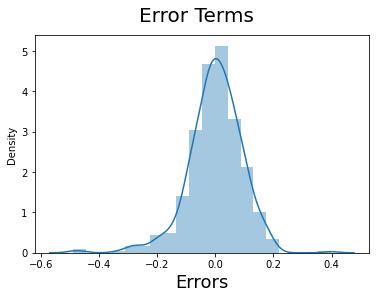

In [86]:
res=y_train-y_train_pred

# Plotting the histogram of the error terms

fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

### There is linear regression between X and Y

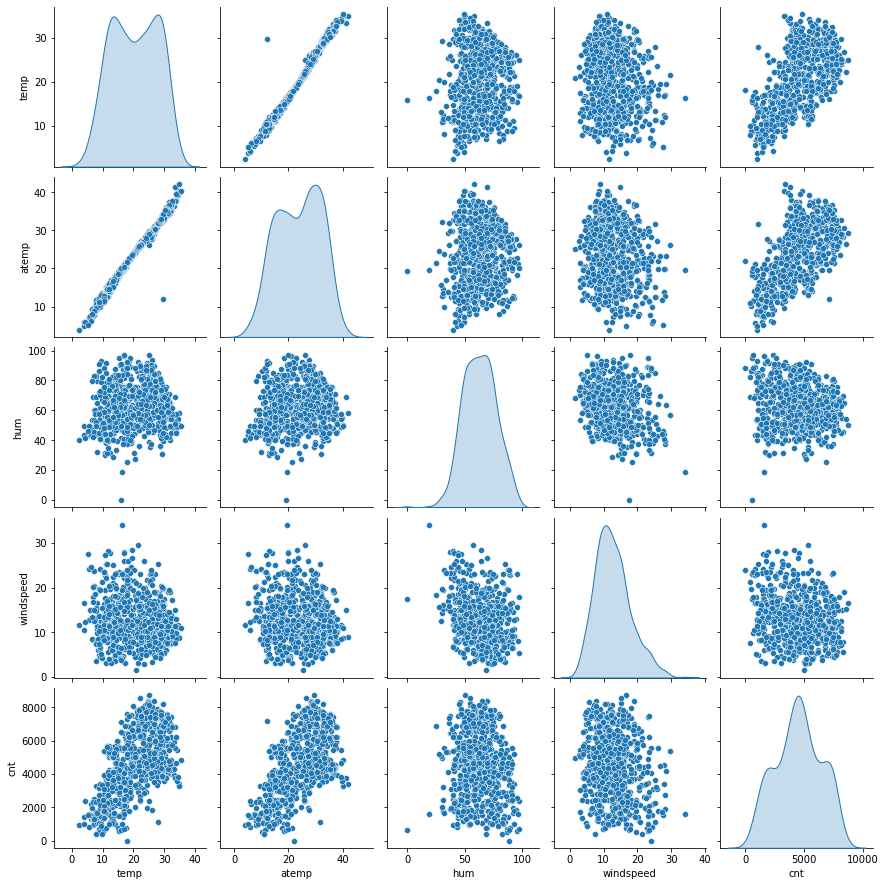

In [87]:
bike_data_new=bike_data_new[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_data_new,diag_kind='kde')
plt.show()

### There is no multicollinearity among the predictors

In [88]:
#VIF check

# Check for VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables and their respective variables
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
3,windspeed,4.72
2,temp,4.66
5,season_winter,2.46
0,yr,1.98
8,mnth_Nov,1.77
4,season_spring,1.72
10,weathersit_Mist,1.53
6,mnth_Dec,1.42
7,mnth_July,1.34
9,weathersit_Light snow,1.06


## Making prediction using final model

In [89]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])


In [90]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sunday,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
49,0,0,1,0.423702,0.417950,0.195238,1.157215,0.189031,1,0,...,0,0,1,0,0,0,0,0,0,0
611,1,0,1,0.830744,0.813351,0.784416,0.510362,0.801828,0,0,...,0,1,0,0,0,0,0,1,0,0
547,1,0,1,0.900316,0.833624,0.464502,0.412422,0.727177,0,0,...,0,0,0,0,0,0,1,0,0,0
432,1,0,0,0.438239,0.425549,0.422943,0.936153,0.532872,1,0,...,0,0,0,1,0,0,0,0,0,1
489,1,0,0,0.700948,0.676485,0.786148,0.311568,0.804055,0,1,...,0,0,0,0,1,0,0,0,0,1


In [91]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sunday,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.520548,0.031963,0.707763,0.553835,0.540076,0.654743,0.410756,0.535824,0.246575,0.260274,...,0.086758,0.095890,0.132420,0.118721,0.146119,0.141553,0.191781,0.114155,0.027397,0.333333
std,0.500722,0.176306,0.455833,0.223458,0.213820,0.149187,0.184947,0.226434,0.432005,0.439789,...,0.282125,0.295115,0.339723,0.324202,0.354034,0.349389,0.394604,0.318728,0.163612,0.472484
min,0.000000,0.000000,0.000000,0.046591,0.026455,0.195238,0.047504,0.070901,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.369188,0.367405,0.539610,0.284857,0.374897,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.552460,0.552272,0.649784,0.390194,0.534044,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.753386,0.718729,0.764718,0.504442,0.726239,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.983385,1.019437,1.010390,1.157215,1.018634,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
y_test=df_test.pop('cnt')
x_test=df_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 49 to 303
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   atemp                  219 non-null    float64
 5   hum                    219 non-null    float64
 6   windspeed              219 non-null    float64
 7   season_spring          219 non-null    uint8  
 8   season_summer          219 non-null    uint8  
 9   season_winter          219 non-null    uint8  
 10  mnth_Aug               219 non-null    uint8  
 11  mnth_Dec               219 non-null    uint8  
 12  mnth_Feb               219 non-null    uint8  
 13  mnth_Jan               219 non-null    uint8  
 14  mnth_July              219 non-null    uint8  
 15  mnth_

In [93]:
# Selecting the variables that part of model

col=x_train_new.columns
x_test=x_test[col]

# Add constant variable to test dataframe
x_test_lm5=sm.add_constant(x_test)

x_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 49 to 303
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   holiday                219 non-null    int64  
 3   temp                   219 non-null    float64
 4   windspeed              219 non-null    float64
 5   season_spring          219 non-null    uint8  
 6   season_winter          219 non-null    uint8  
 7   mnth_Dec               219 non-null    uint8  
 8   mnth_July              219 non-null    uint8  
 9   mnth_Nov               219 non-null    uint8  
 10  weathersit_Light snow  219 non-null    uint8  
 11  weathersit_Mist        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [94]:
# Making prediction using final model

y_pred=lr5.predict(x_test_lm5)

## Model Evaluation

Text(0, 0.5, 'y_pred')

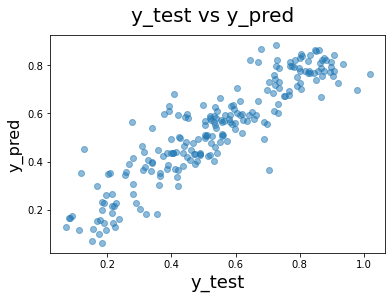

In [95]:
# Plotting y_test,y_pred to understand the spread

fig=plt.figure()
plt.scatter(y_test,y_pred,alpha=0.5)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8177511430070934

### Final equation
y= 0.2747+ yr * 0.2351+holiday *-0.1034+temp * 0.4341+windspeed*-0.0833+season_spring * -0.1339+season_winter * 0.0895 +mnth_Dec *-0.0645+mnth_July *-0.0693+mnth_Nov * -0.0956+weathersit_Light snow *-0.2747+weathersit_Mist *-0.0862 